<a href="https://colab.research.google.com/github/srinath070909/python_list/blob/main/17_02_25.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
df=pd.read_csv("emotion.csv")
df.head()


,text,label
0,i didnt feel humiliated,0
1,i can go from feeling so hopeless to so damned...,0
2,im grabbing a minute to post i feel greedy wrong,3
3,i am ever feeling nostalgic about the fireplac...,2
4,i am feeling grouchy,3


In [ ]:
df.shape

(16000, 2)

In [ ]:
df.info

<bound method DataFrame.info of                                                     text  label
0                                i didnt feel humiliated      0
1      i can go from feeling so hopeless to so damned...      0
2       im grabbing a minute to post i feel greedy wrong      3
3      i am ever feeling nostalgic about the fireplac...      2
4                                   i am feeling grouchy      3
...                                                  ...    ...
15995  i just had a very brief time in the beanbag an...      0
15996  i am now turning and i feel pathetic that i am...      0
15997                     i feel strong and good overall      1
15998  i feel like this was such a rude comment and i...      3
15999  i know a lot but i feel so stupid because i ca...      0

[16000 rows x 2 columns]>

<Axes: xlabel='label', ylabel='count'>

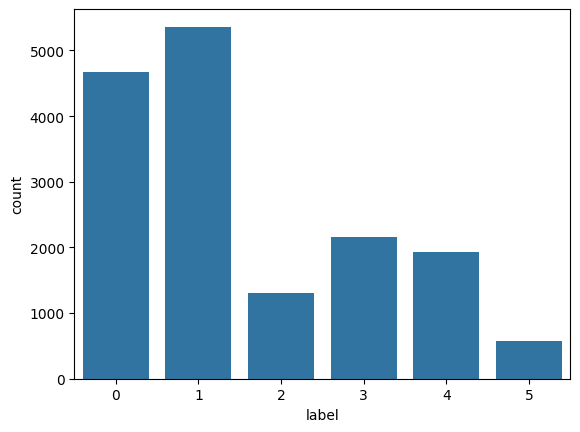

In [ ]:
import seaborn as sns
sns.countplot(x=df.label)

In [ ]:
df.isna().sum()

,0
text,0
label,0


In [ ]:
# convert text to lower case
df['text'] = df['text'].apply(lambda x: " ".join(x.lower() for x in x.split()))

In [ ]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
from nltk.corpus import stopwords
stop = stopwords.words('english')
df['text'] = df['text'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))

In [ ]:
!pip install textblob

In [ ]:
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [ ]:
# Do lemmatization
from nltk.stem import WordNetLemmatizer
from textblob import Word
df['text'] = df['text'].apply(lambda x: " ".join([Word(word).lemmatize() for word in x.split()]))
df['text'].head()

,text
0,didnt feel humiliated
1,go feeling hopeless damned hopeful around some...
2,im grabbing minute post feel greedy wrong
3,ever feeling nostalgic fireplace know still pr...
4,feeling grouchy


In [ ]:
# get features and seperate data
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer()
X = tfidf.fit_transform(df['text'])
X = X.toarray()
y = df.label.values

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2,
                                                    shuffle=True, random_state = 0)

In [ ]:
from sklearn.naive_bayes import GaussianNB
#Initialize GaussianNB classifier
model = GaussianNB()
#Fit the model on the train dataset
model = model.fit(X_train, y_train)
#Make predictions on the test dataset
pred = model.predict(X_test)



In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [ ]:
print(confusion_matrix(y_test, pred))

[[293 116 117 144 171  64]
 [175 388 193  96 132  69]
 [ 48  60 103  15  32  13]
 [ 84  85  53 146  58  33]
 [ 84  61  38  37 147  30]
 [ 23  16  10   5  20  41]]


In [ ]:
print(accuracy_score(y_test, pred))

0.349375


In [ ]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.41      0.32      0.36       905
           1       0.53      0.37      0.44      1053
           2       0.20      0.38      0.26       271
           3       0.33      0.32      0.32       459
           4       0.26      0.37      0.31       397
           5       0.16      0.36      0.22       115

    accuracy                           0.35      3200
   macro avg       0.32      0.35      0.32      3200
weighted avg       0.40      0.35      0.36      3200



In [25]:
from sklearn.ensemble import RandomForestClassifier
clf_rf=RandomForestClassifier()

#Train the model using the training sets
clf_rf.fit(X_train,y_train)

rf_pred=clf_rf.predict(X_test).astype(int)



In [26]:
print(confusion_matrix(y_test, rf_pred))

[[826  34   7  18  19   1]
 [ 26 976  26  11   9   5]
 [  4  61 203   2   1   0]
 [ 35  35   1 382   5   1]
 [ 13  15   4  24 328  13]
 [  4  14   0   0  12  85]]


In [27]:
print(accuracy_score(y_test, rf_pred))

0.875


In [ ]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
lr_pred = logreg.predict(X_test)


In [ ]:
print(classification_report(y_test, lr_pred))

In [ ]:
print(confusion_matrix(y_test, lr_pred))